In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import time
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats

df = pd.read_csv('combineddata.tsv',sep='\t')

/var/folders/mm/sy9415ls5x5b769gx9tfj8ph0000gn/T/ipykernel_41205/1457097889.py:13: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combineddata.tsv',sep='\t')


## <span style='color:Blue'>Import the dataset</span>

In [2]:
#Preview the dataset
df.head()

,tconst,language,title type,primary title,original title,isAdult,start year,end year,runtime minutes,genres,averageRating,numVotes
0,tt0123368,Czech,movie,...and the Fifth Horseman Is Fear,...a p√°t√Ω jezdec je Strach,0,1965,\N,100,"Drama,War",7.2,594
1,tt0123370,Hindi,movie,Return of Robin Hood,Aaj Ka Robin Hood,0,1988,\N,80,Drama,7.0,30
2,tt0123371,English,movie,Aberration,Aberration,0,1997,\N,93,"Horror,Sci-Fi",4.6,998
3,tt0123373,Danish,movie,Evening Land,Aftenlandet,0,1977,\N,109,"Drama,Sci-Fi",7.2,135
4,tt0123376,English,movie,Alegría,Alegr√≠a,0,1999,\N,94,"Drama,Fantasy,Romance",6.5,565


## <span style='color:Blue'>Try to find correlation of continuous variables</span>

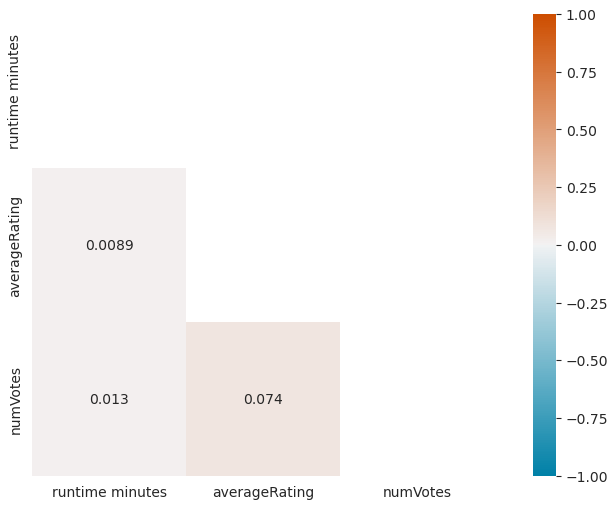

In [3]:
#Preview the correlation matrix
corrMatrix = df.corr()

corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,6))
    ax = sns.heatmap(corrMatrix, mask=mask, vmax=1, vmin=-1,annot=True, center=0, 
                     square=True, cmap=sns.diverging_palette(230, 22, s=100, as_cmap=True), 
                     annot_kws={"fontsize":10})

## <span style='color:Blue'>Between Number of Votes and Average Rating might see the correlation a bit</span>

In [4]:
#Add English or Non English Column
df.loc[df['language']=='English', 'engVsNot'] = 'English'
df.loc[df['language']!='English', 'engVsNot'] = 'NonEnglish'

In [5]:
#Preview the dataset
df.head()

,tconst,language,title type,primary title,original title,isAdult,start year,end year,runtime minutes,genres,averageRating,numVotes,engVsNot
0,tt0123368,Czech,movie,...and the Fifth Horseman Is Fear,...a p√°t√Ω jezdec je Strach,0,1965,\N,100,"Drama,War",7.2,594,NonEnglish
1,tt0123370,Hindi,movie,Return of Robin Hood,Aaj Ka Robin Hood,0,1988,\N,80,Drama,7.0,30,NonEnglish
2,tt0123371,English,movie,Aberration,Aberration,0,1997,\N,93,"Horror,Sci-Fi",4.6,998,English
3,tt0123373,Danish,movie,Evening Land,Aftenlandet,0,1977,\N,109,"Drama,Sci-Fi",7.2,135,NonEnglish
4,tt0123376,English,movie,Alegría,Alegr√≠a,0,1999,\N,94,"Drama,Fantasy,Romance",6.5,565,English


## <span style='color:green'>1. Do non-English films have fewer reviews and ratings, regardless of their average rating?</span>

In [6]:
model1 = smf.ols(formula='numVotes ~ engVsNot', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               numVotes   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2122.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:48:47   Log-Likelihood:            -2.9018e+06
No. Observations:              242550   AIC:                         5.804e+06
Df Residuals:                  242548   BIC:                         5.804e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               8133

## <span style='color:Blue'>Running a T-test, the Non-English group of movies have significantly less votes (reviews).  On average the Non-English films had 7131 fewer votes than English films (t_{242548} = 46.068, p < 0.001). </span>
    

## <span style='color:Blue'>This assumes that variance is roughly equivilant, which was not tested for.  Also, number of samples in each group</span>

In [7]:
model3 = smf.ols(formula='averageRating ~ language', data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     42.84
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:48:58   Log-Likelihood:            -4.0713e+05
No. Observations:              242550   AIC:                         8.147e+05
Df Residuals:                  242354   BIC:                         8.167e+05
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

## <span style='color:Blue'>Running an ANOVA for average rating by languages, there are significant differences between the averages.  (F = 42.84, p<0.01) </span>

## <span style='color:green'>3. Do certain languages do better when it comes to ratings/reviews overall?  </span>

In [8]:
model3b = smf.ols(formula='averageRating ~ engVsNot', data=df).fit()
print(model3b.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     555.3
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          1.20e-122
Time:                        15:48:59   Log-Likelihood:            -4.1097e+05
No. Observations:              242550   AIC:                         8.219e+05
Df Residuals:                  242548   BIC:                         8.220e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

## <span style='color:Blue'>NonEnglish movie rating on average (about 6.2) are larger than the average rating on English movies (6.0798). Looking at a standard error of 0.005, T value of 23.565, and P value less than 0.001. It is significant, but may not be practically significant. </span>

## <span style='color:green'>5. Which films are “underrated gems,” that have high ratings, but relatively low view counts? </span>

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1337.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          6.09e-292
Time:                        15:48:59   Log-Likelihood:            -4.1058e+05
No. Observations:              242550   AIC:                         8.212e+05
Df Residuals:                  242548   BIC:                         8.212e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1376      0.003   2284.499      0.0

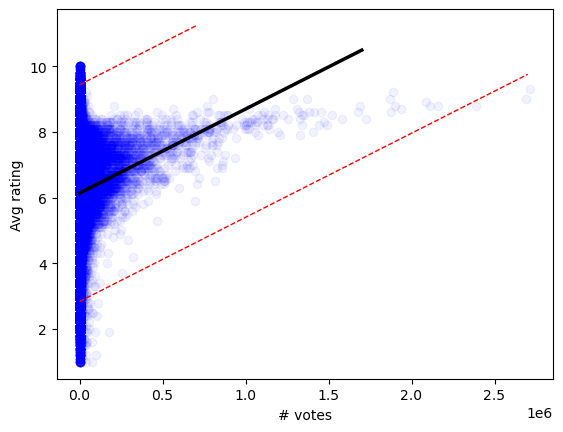

In [9]:
model5 = smf.ols(formula='averageRating ~ numVotes', data=df).fit()
print(model5.summary())

plt.plot(df.numVotes, df.averageRating, 'bo', alpha = 0.05);
plt.xlabel('# votes')
plt.ylabel('Avg rating');

a, b = model5.params

ratingStd = np.std(df.averageRating)

# Create sequence 
xseq = np.linspace(0, 1700000, num=10)
xsequ = np.linspace(0, 700000, num=10)
xseql = np.linspace(0, 2700000, num=10)

# Plot regression line
plt.plot(xseq, a + b * xseq, color="k", lw=2.5);
plt.plot(xsequ, a + b * xsequ + 2.5 * ratingStd, color="r", lw=1, ls="dashed");
plt.plot(xseql, a + b * xseql - 2.5 *ratingStd, color="r", lw=1, ls = "dashed");

print("Mean of num of Votes", np.mean(df.numVotes))
print("Mean of Average Rating", np.mean(df.averageRating))
print("SD of num of Votes", np.std(df.numVotes))
print("SD of Average Rating", np.std(df.averageRating))

## <span style='color:Blue'>The average rating distribution is roughly similarly distributed in the chart between the average rating and the number of votes?? </span>

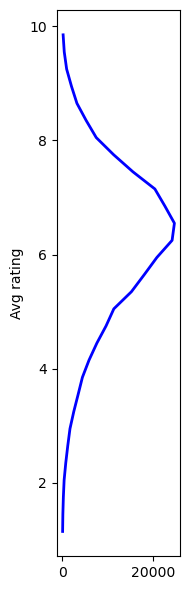

In [10]:
plt.rcParams["figure.figsize"] = [2, 6]
plt.rcParams["figure.autolayout"] = True
y, binEdges = np.histogram(df.averageRating, bins=30)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
plt.plot(y, bincenters, 'b-', lw=2);
plt.ylabel('Avg rating');
plt.show()

In [11]:
df.loc[df['averageRating']>a +b * df['numVotes'] + 2.5 * ratingStd, 'hiddenJems'] = True
df.loc[df['averageRating']<= a +b * df['numVotes'] + 2.5 * ratingStd, 'hiddenJems'] = False
onlyTrue = df[df['hiddenJems']== True]
onlyTrue.head(10)

,tconst,language,title type,primary title,original title,isAdult,start year,end year,runtime minutes,genres,averageRating,numVotes,engVsNot,hiddenJems
18526,tt0222023,Spanish,movie,Long Sleepless Nights,Hubo un tiempo en que los sue√±os dieron paso ...,0,2000,\N,50,Drama,9.7,10,NonEnglish,True
24485,tt0262389,Telugu,movie,Edadugula Bandham,Edadugula Bandham,0,1985,\N,142,Drama,9.7,136,NonEnglish,True
26389,tt0274494,Italian,movie,Faber,Faber,0,2001,\N,45,Documentary,9.8,9,NonEnglish,True
26802,tt0276876,English,movie,Against Reason and by Force,Contra la razon y por la fuerza,0,1974,\N,50,Documentary,9.6,5,English,True
44771,tt0444194,Tagalog,movie,"Isa para sa lahat, lahat para sa isa","Isa para sa lahat, lahat para sa isa",0,1979,\N,117,Action,9.7,10,NonEnglish,True
47241,tt0473205,English,movie,Forbidden Forest,Forbidden Forest,0,2004,\N,70,Documentary,9.5,9,English,True
47701,tt0478554,Tagalog,movie,Angelito San Miguel at Ang Mga Batang City Jail,Angelito San Miguel at Ang Mga Batang City Jail,0,1991,\N,107,"Action,Crime,Drama",9.8,13,NonEnglish,True
54778,tt0997212,English,movie,Cafe Coexistence,Cafe Coexistence,0,2009,\N,68,"Comedy,Drama",9.6,13,English,True
57213,tt0247655,Hindi,movie,Rangili,Rangili,0,1952,\N,150,Drama,9.6,8,NonEnglish,True
58441,tt0305275,English,movie,Battleship Texas: The Lone Star Ship,Battleship Texas: The Lone Star Ship,0,2001,\N,46,"Documentary,War",9.5,7,English,True


## <span style='color:Blue'>Here is a list of the hidden jems. These are defined as the movies that are rated average 2.5 standard deviations above the average when controlling for the number of votes. </span>

## <span style='color:Blue'>This is not normal data, however.  Perpaps standard linear regression is not ideal method. Maybe Gamma regression.</span>